In [16]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 90
pd.options.display.float_format = '{:.1f}'.format

train_df = pd.read_csv("./train.csv", sep=",")

test_df = pd.read_csv("./test.csv", sep=",")

train_df = train_df.reindex(np.random.permutation(train_df.index))

In [17]:
display.display(train_df.head())
display.display(train_df.describe())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
61,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
624,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
1274,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
749,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
622,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,70.0,10516.8,6.1,5.6,1971.3,1984.9,103.7,443.6,...,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,24.3,9981.3,1.4,1.1,30.2,20.6,181.1,456.1,...,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [3]:
print (train_df.isnull().sum())
display.display(train_df.info())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

None

In [4]:
train_df['SalePrice'].describe()

count     1460.0
mean    180921.2
std      79442.5
min      34900.0
25%     129975.0
50%     163000.0
75%     214000.0
max     755000.0
Name: SalePrice, dtype: float64

count   1459.0
mean    1971.4
std       30.4
min     1879.0
25%     1953.0
50%     1973.0
75%     2001.0
max     2010.0
Name: YearBuilt, dtype: float64

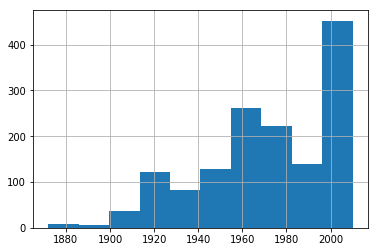

In [5]:
train_df['YearBuilt'].hist()
train_df['YearBuilt'].describe()
test_df['YearBuilt'].describe()

/home/bbixby/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


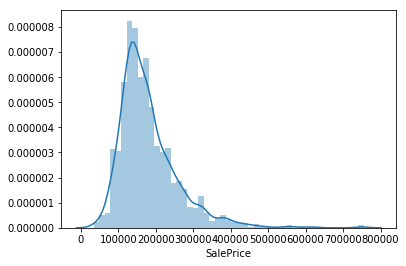

In [6]:
sns.distplot(train_df['SalePrice']);

/home/bbixby/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


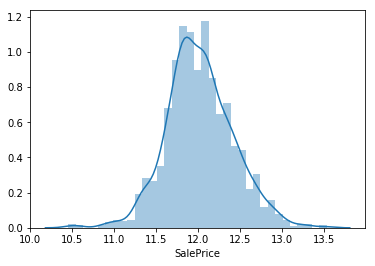

In [7]:
sns.distplot(np.log(train_df['SalePrice']));

In [8]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [9]:
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.1,-0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.1,-0.0,0.0,0.0,-0.0
MSSubClass,0.0,1.0,-0.4,-0.1,0.0,-0.1,0.0,0.0,0.0,-0.1,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.1
LotFrontage,-0.0,-0.4,1.0,0.4,0.3,-0.1,0.1,0.1,0.2,0.2,...,0.1,0.2,0.0,0.1,0.0,0.2,0.0,0.0,0.0,0.4
LotArea,-0.0,-0.1,0.4,1.0,0.1,-0.0,0.0,0.0,0.1,0.2,...,0.2,0.1,-0.0,0.0,0.0,0.1,0.0,0.0,-0.0,0.3
OverallQual,-0.0,0.0,0.3,0.1,1.0,-0.1,0.6,0.6,0.4,0.2,...,0.2,0.3,-0.1,0.0,0.1,0.1,-0.0,0.1,-0.0,0.8
OverallCond,0.0,-0.1,-0.1,-0.0,-0.1,1.0,-0.4,0.1,-0.1,-0.0,...,-0.0,-0.0,0.1,0.0,0.1,-0.0,0.1,-0.0,0.0,-0.1
YearBuilt,-0.0,0.0,0.1,0.0,0.6,-0.4,1.0,0.6,0.3,0.2,...,0.2,0.2,-0.4,0.0,-0.1,0.0,-0.0,0.0,-0.0,0.5
YearRemodAdd,-0.0,0.0,0.1,0.0,0.6,0.1,0.6,1.0,0.2,0.1,...,0.2,0.2,-0.2,0.0,-0.0,0.0,-0.0,0.0,0.0,0.5
MasVnrArea,-0.1,0.0,0.2,0.1,0.4,-0.1,0.3,0.2,1.0,0.3,...,0.2,0.1,-0.1,0.0,0.1,0.0,-0.0,-0.0,-0.0,0.5
BsmtFinSF1,-0.0,-0.1,0.2,0.2,0.2,-0.0,0.2,0.1,0.3,1.0,...,0.2,0.1,-0.1,0.0,0.1,0.1,0.0,-0.0,0.0,0.4


In [10]:
def preprocess_features(df):
  selected_features = df[
    ["OverallQual",
     "GrLivArea",
     "YearBuilt"]]
  processed_features = selected_features.copy()
  # Create a synthetic feature.
#   processed_features["rooms_per_person"] = (
#     california_housing_dataframe["total_rooms"] /
#     california_housing_dataframe["population"])
  return processed_features

def preprocess_targets(df):
  output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
#   output_targets["SalePrice"] = (
#     df["SalePrice"] / 1000.0)
  output_targets["SalePrice"] = (
    np.log(df['SalePrice']))
  return output_targets

In [11]:
# Choose the first 1022 (out of 1460) examples for training.
training_examples = preprocess_features(train_df.head(1022))
training_targets = preprocess_targets(train_df.head(1022))

# Choose the last 438 (out of 1460) examples for validation.
validation_examples = preprocess_features(train_df.tail(438))
validation_targets = preprocess_targets(train_df.tail(438))

# Double-check that we've done the right thing.
# print("Training examples summary:")
# display.display(training_examples.describe())
# print("Validation examples summary:")
# display.display(validation_examples.describe())

# print("Training targets summary:")
# display.display(training_targets.describe())
# print("Validation targets summary:")
# display.display(validation_targets.describe())

In [12]:
OverallQual_numeric = tf.feature_column.numeric_column(key='OverallQual')
GrLivArea_numeric = tf.feature_column.numeric_column(key='GrLivArea')
YearBuilt_numeric = tf.feature_column.numeric_column(key='YearBuilt')
YearBuilt_feature = tf.feature_column.bucketized_column(source_column=YearBuilt_numeric, boundaries=[1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])

def construct_feature_columns():
    return ([OverallQual_numeric, GrLivArea_numeric, YearBuilt_feature])

In [13]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    ds = Dataset.from_tensor_slices((features,targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
      ds = ds.shuffle(1022)
    
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [14]:
def train_linear_regressor_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):

  periods = 10
  steps_per_period = steps / periods

  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(),
      optimizer=my_optimizer
  )
    
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["SalePrice"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["SalePrice"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["SalePrice"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  
  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 3.59
  period 01 : 3.78
  period 02 : 3.74
  period 03 : 3.75
  period 04 : 3.59
  period 05 : 3.56
  period 06 : 3.56
  period 07 : 3.56
  period 08 : 3.56
  period 09 : 3.55
Model training finished.
{'label/mean': 12.017717, 'prediction/mean': 11.089252, 'loss': 15.229517, 'global_step': 5000, 'average_loss': 15.229517}


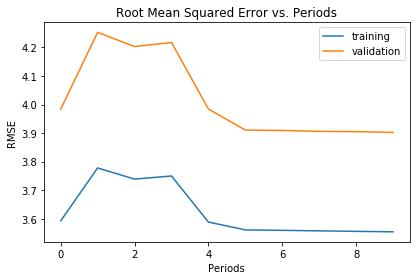

In [15]:
linear_regressor = train_linear_regressor_model(
    learning_rate=0.0001,
    steps=5000,
    batch_size=10,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["SalePrice"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
evaluation_metrics = linear_regressor.evaluate(input_fn=predict_validation_input_fn)

print(evaluation_metrics)
# print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
# print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])